In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [23]:
df_pogoda = pd.read_parquet('data/2023/processed_weather.parquet')
df_profile = pd.read_parquet('data/2023/processed_standardowe_profile_enea.parquet')
df_pse = pd.read_parquet('data/2023/processed_PSE_BPKD.parquet')
df_ceny = pd.read_parquet('data/2023/processed_rce.parquet')

# 1. RCE

In [3]:
df_rce = pd.read_parquet('data/2023/processed_rce.parquet')
df_rce.describe().round(2)

,Cena PLN/MWh
count,8760.00
mean,510.62
std,176.42
min,-53.77
25%,424.02
50%,511.50
75%,616.88
max,1052.72


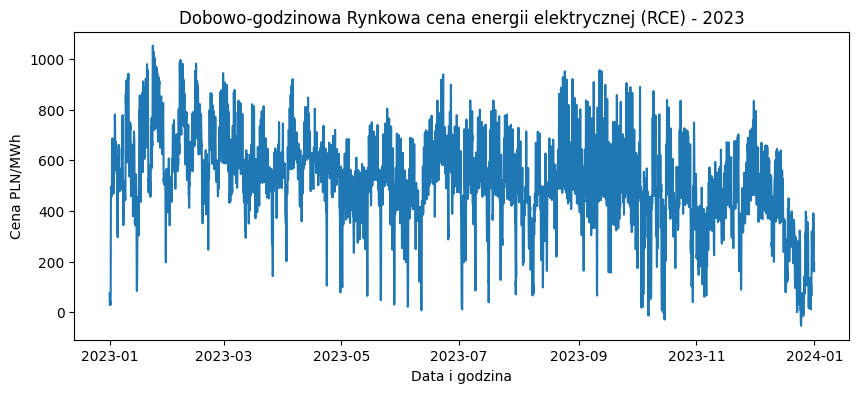

In [4]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_rce, x='Data Godzina', y='Cena PLN/MWh')
plt.xlabel('Data i godzina')
plt.ylabel('Cena PLN/MWh')
plt.title('Dobowo-godzinowa Rynkowa cena energii elektrycznej (RCE) - 2023')
plt.show()

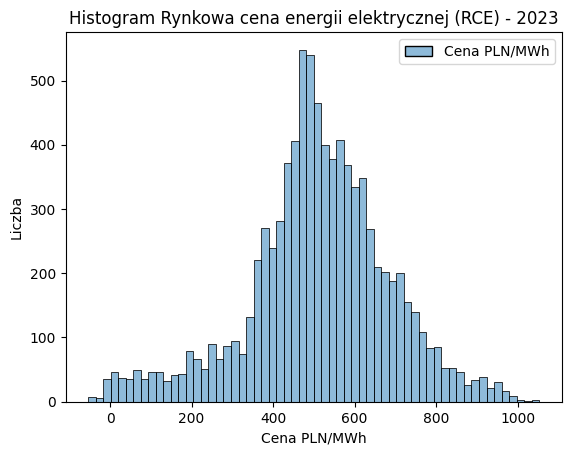

In [5]:
# plt.figure(figsize=(10,4))
sns.histplot(df_rce)
plt.xlabel('Cena PLN/MWh')
plt.ylabel('Liczba')
plt.title('Histogram Rynkowa cena energii elektrycznej (RCE) - 2023')
plt.show()

In [6]:
df_ceny_rdn_hist = pd.read_parquet('data/obrobione_Ceny_2016_24.parquet')
df_ceny_rdn_hist['Miesiąc'] = df_ceny_rdn_hist['Data Godzina'].dt.month
df_ceny_rdn_hist['Rok'] = df_ceny_rdn_hist['Data Godzina'].dt.year
df_ceny_rdn_hist = df_ceny_rdn_hist.groupby(['Miesiąc', 'Rok']).agg({
    'Cena PLN/MWh': 'mean',
    'Data Godzina': 'min'
})

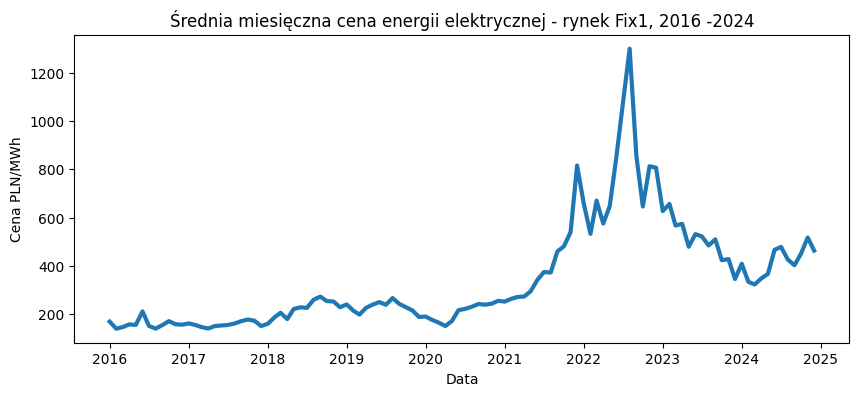

In [7]:
plt.figure(figsize=(10,4))
sns.lineplot(x=df_ceny_rdn_hist['Data Godzina'], y=df_ceny_rdn_hist['Cena PLN/MWh'], linewidth=3)
plt.xlabel('Data')
plt.ylabel('Cena PLN/MWh')
plt.title('Średnia miesięczna cena energii elektrycznej - rynek Fix1, 2016 -2024')
plt.show()

## 2. Standardowe profile

In [8]:
df_profile

,Data,Godzina,Wskaźnik zużycia %,Data Godzina,Roczne zużycie gd MWh,Godzinowe zużycie gd MWh,Miesiąc,Modelowe godzinowe zużycie gd MWh,Delta godzinowe zużycie gd MWh
0,2023-01-01,1,0.000126,2023-01-01 00:00:00+01:00,29774500.0,3758.5691,1,3038.893710,719.675390
1,2023-01-01,2,0.000117,2023-01-01 01:00:00+01:00,29774500.0,3481.2494,1,2728.352016,752.897384
2,2023-01-01,3,0.000108,2023-01-01 02:00:00+01:00,29774500.0,3219.9365,1,2535.131461,684.805039
3,2023-01-01,4,0.000091,2023-01-01 03:00:00+01:00,29774500.0,2718.3583,1,2388.055613,330.302687
4,2023-01-01,5,0.000091,2023-01-01 04:00:00+01:00,29774500.0,2712.2664,1,2487.123248,225.143152
...,...,...,...,...,...,...,...,...,...
8755,2023-12-31,20,0.000182,2023-12-31 19:00:00+01:00,29774500.0,5419.0513,12,5169.025029,250.026271
8756,2023-12-31,21,0.000172,2023-12-31 20:00:00+01:00,29774500.0,5132.3973,12,5063.129719,69.267581
8757,2023-12-31,22,0.000158,2023-12-31 21:00:00+01:00,29774500.0,4704.2251,12,4659.578229,44.646871
8758,2023-12-31,23,0.000148,2023-12-31 22:00:00+01:00,29774500.0,4414.5341,12,4075.705474,338.828626


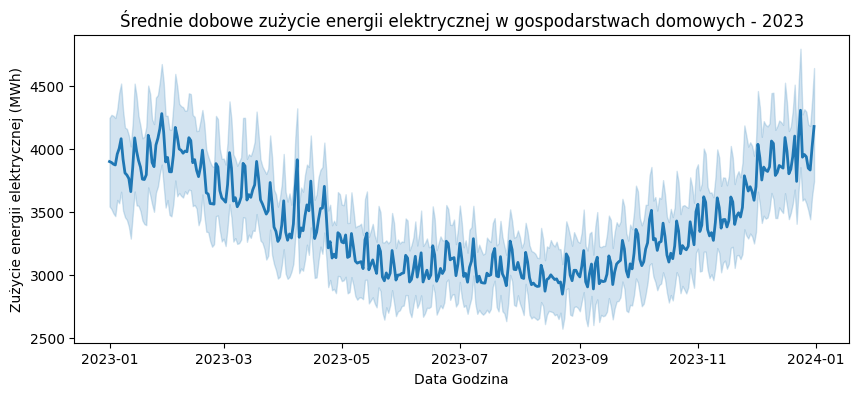

In [9]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_profile, x='Data', y='Godzinowe zużycie gd MWh', linewidth=2, errorbar=('ci', 95))
plt.xlabel('Data Godzina')
plt.ylabel('Zużycie energii elektrycznej (MWh)')
plt.title('Średnie dobowe zużycie energii elektrycznej w gospodarstwach domowych - 2023')
plt.show()

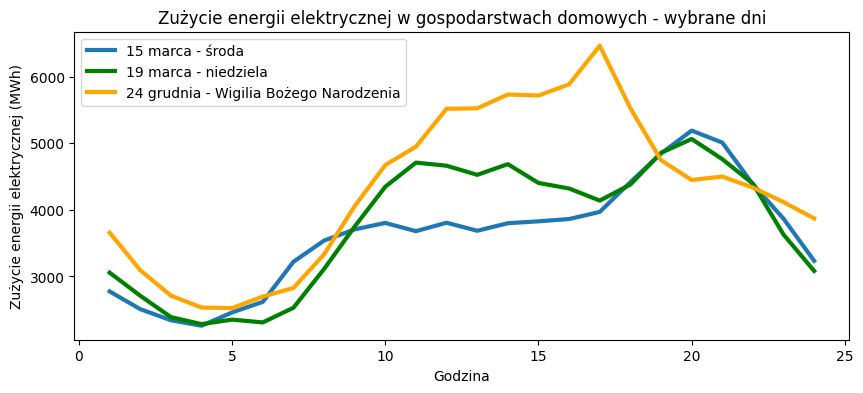

In [10]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_profile[df_profile['Data'] == '2023-03-15'], x='Godzina', y='Godzinowe zużycie gd MWh',
              linewidth=3, label='15 marca - środa')
sns.lineplot(data=df_profile[df_profile['Data'] == '2023-03-19'], x='Godzina', y='Godzinowe zużycie gd MWh',
              linewidth=3, label='19 marca - niedziela', color='green')
sns.lineplot(data=df_profile[df_profile['Data'] == '2023-12-24'], x='Godzina', y='Godzinowe zużycie gd MWh',
              linewidth=3, label='24 grudnia - Wigilia Bożego Narodzenia', color='orange')
# sns.lineplot(data=df_profile[df_profile['Data'] == '2023-01-01'], x='Godzina', y='Godzinowe zużycie gd MWh',
#               linewidth=3, label='01 stycznia - Nowy Rok', color='red')
plt.legend()
plt.xlabel('Godzina')
plt.ylabel('Zużycie energii elektrycznej (MWh)')
plt.title('Zużycie energii elektrycznej w gospodarstwach domowych - wybrane dni')
plt.show()

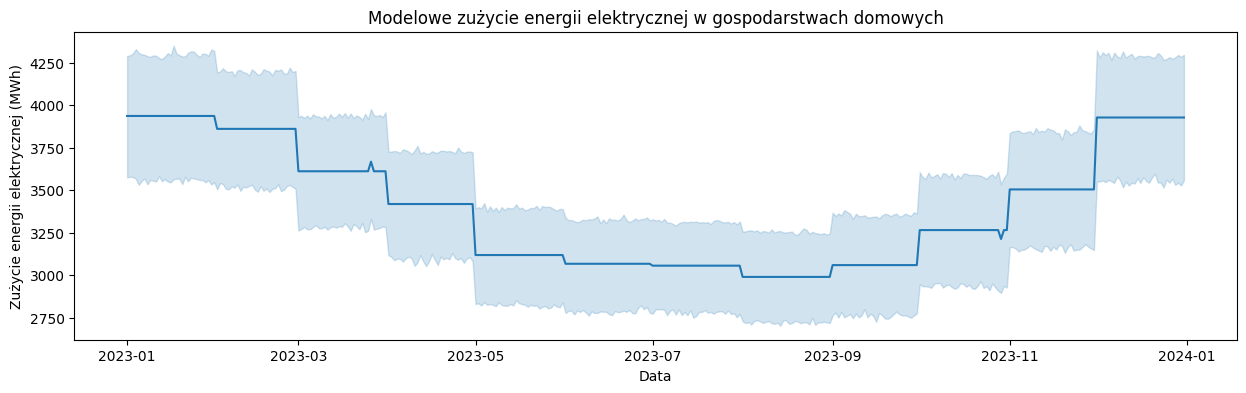

In [11]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_profile, x='Data', y='Modelowe godzinowe zużycie gd MWh')
plt.xlabel('Data')
plt.ylabel('Zużycie energii elektrycznej (MWh)')
plt.title('Modelowe zużycie energii elektrycznej w gospodarstwach domowych')

plt.show()

In [12]:
# plt.figure(figsize=(15,6))
# sns.lineplot(data=df_profile, x='Data', y='Modelowe godzinowe zużycie gd MWh', hue='Godzina', palette='coolwarm')
# plt.xlabel('Data')
# plt.ylabel('Zużycie energii elektrycznej (MWh)')
# plt.title('Modelowe zużycie energii elektrycznej w gospodarstwach domowych')
# 
# plt.show()

In [13]:

# df_profile = df_profile[df_profile['Data'] >= datetime.date(2023,12,20)]
# plt.figure(figsize=(15,6))
# plt.plot(df_profile['Data Godzina'], df_profile['Delta godzinowe zużycie gd MWh'])
# plt.xlabel('Data')
# plt.ylabel('Zużycie energii elektrycznej (MWh)')
# plt.title('Różnica między krzywą empiryczną i modelową')
# plt.show()

## 3.BPKD

In [14]:
df_bpkd_plot = pd.read_parquet('data/2023/processed_PSE_BPKD.parquet')
df_bpkd_plot['Data'] = df_bpkd_plot['Data Godzina'].dt.date
df_bpkd_plot['Data'] = pd.to_datetime(df_bpkd_plot['Data'])
df_bpkd_plot = df_bpkd_plot.groupby('Data').sum(numeric_only=True).reset_index()
df_bpkd_plot


,Data,Godzinowe zużycie krajowe MWh,Generacja ze źródeł wiatrowych MWh,Generacja ze źródeł fotowoltaicznych MWh
0,2023-01-01,335776.0,113616.0,12784.0
1,2023-01-02,449069.0,112675.0,8899.0
2,2023-01-03,483180.0,108812.0,9631.0
3,2023-01-04,496693.0,130832.0,7932.0
4,2023-01-05,494129.0,157932.0,3698.0
...,...,...,...,...
360,2023-12-27,436327.0,124342.0,16471.0
361,2023-12-28,448488.0,151379.0,14270.0
362,2023-12-29,440672.0,175772.0,11069.0
363,2023-12-30,416898.0,140506.0,9047.0


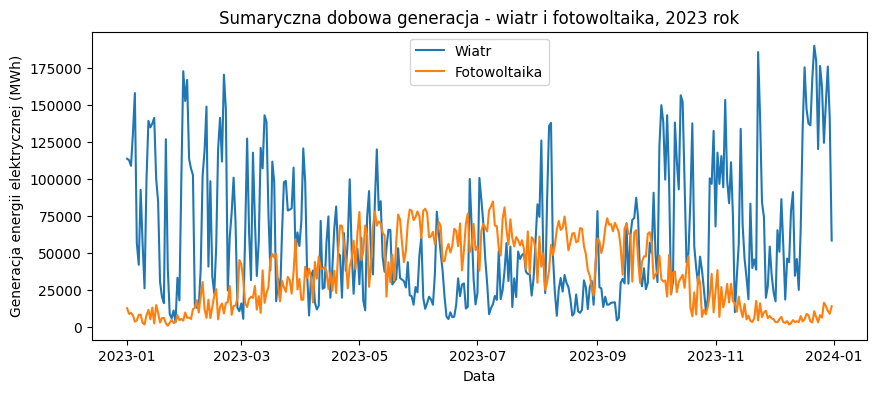

In [15]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_bpkd_plot, x='Data', y='Generacja ze źródeł wiatrowych MWh', label='Wiatr')
sns.lineplot(data=df_bpkd_plot, x='Data', y='Generacja ze źródeł fotowoltaicznych MWh', label='Fotowoltaika')
# sns.lineplot(data=df_bpkd_plot, x='Data', y='Godzinowe zużycie krajowe MWh', label='Zapotrzebowanie')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Generacja energii elektrycznej (MWh)')
plt.title('Sumaryczna dobowa generacja - wiatr i fotowoltaika, 2023 rok')
plt.savefig('./wizualizacje/3.BPKD-wiat_foto.png')

In [16]:
df_bpkd_plot['Dzień tygodnia'] = df_bpkd_plot['Data'].dt.weekday

Text(0.5, 1.0, 'Sumaryczne dobowe zużycie energii - 2023 rok')

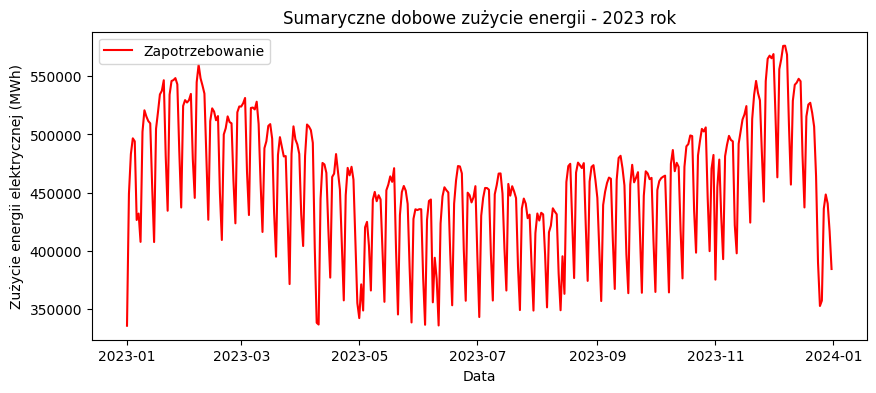

In [17]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_bpkd_plot, x='Data', y='Godzinowe zużycie krajowe MWh', label='Zapotrzebowanie', color='red')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Zużycie energii elektrycznej (MWh)')
plt.title('Sumaryczne dobowe zużycie energii - 2023 rok')
# plt.savefig('./wizualizacje/3.BPKD-zuzycie.png')

Text(0.5, 1.0, 'Sumaryczne dobowe zużycie energii - 2023 rok')

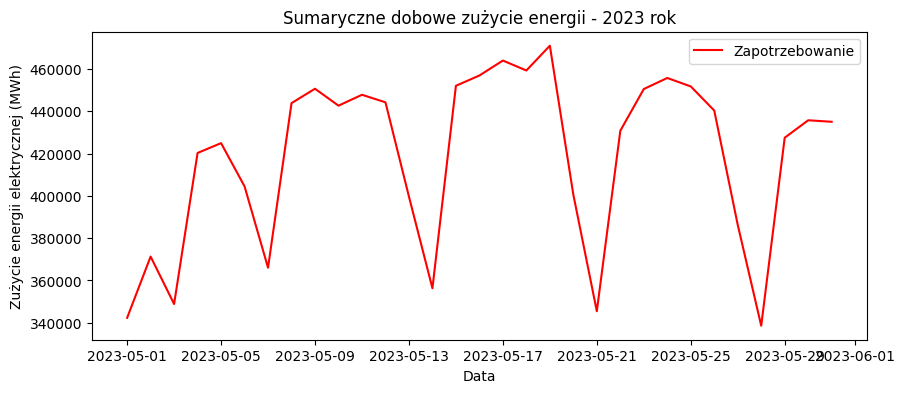

In [18]:
df_bpkd_week = df_bpkd_plot[(df_bpkd_plot['Data'] >= '2023-05-01') & (df_bpkd_plot['Data'] <= '2023-05-31')].copy()
plt.figure(figsize=(10,4))
sns.lineplot(data=df_bpkd_week, x='Data', y='Godzinowe zużycie krajowe MWh', label='Zapotrzebowanie', color='red')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Zużycie energii elektrycznej (MWh)')
plt.title('Sumaryczne dobowe zużycie energii - 2023 rok')
# plt.savefig('./wizualizacje/3.BPKD-zuzycie.png')

In [19]:
df_bpkd_plot['Generacja ze źródeł wiatrowych MWh'].sum() / df_bpkd_plot['Godzinowe zużycie krajowe MWh'].sum()

0.13356715039913988

In [20]:
df_bpkd_plot['Generacja ze źródeł fotowoltaicznych MWh'].sum() / df_bpkd_plot['Godzinowe zużycie krajowe MWh'].sum()

0.07832965587541647

In [21]:
(df_bpkd_plot['Generacja ze źródeł wiatrowych MWh'].sum() + df_bpkd_plot['Generacja ze źródeł fotowoltaicznych MWh'].sum() ) / \
df_bpkd_plot['Godzinowe zużycie krajowe MWh'].sum() 

0.21189680627455634

## Połączenie danych

In [24]:
df_profile = df_profile[['Data Godzina', 'Delta godzinowe zużycie gd MWh', 'Godzinowe zużycie gd MWh']].copy()
df = pd.merge(df_profile, df_pse, on='Data Godzina')
df = pd.merge(df, df_ceny, on='Data Godzina')
df = pd.merge(df, df_pogoda, on='Data Godzina')

In [25]:
import holidays
polish_holidays = holidays.Poland(years=2023)
df['Święto'] = 0
df.loc[df['Data Godzina'].dt.date.isin(polish_holidays.keys()), 'Święto'] = 1

df['Dzień tygodnia'] = df['Data Godzina'].dt.weekday
df['Godzina'] = df['Data Godzina'].dt.hour
df['Miesiąc'] = df['Data Godzina'].dt.month

In [26]:
df.to_parquet('data/2023/for_ml_model.parquet')